In [60]:
import pickle as pckl
import seaborn as sb
import pandas as pd
from datetime import datetime
import numpy as np

import seaborn as sb
import datetime
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib.dates import DateFormatter

In [93]:
df = pckl.load(open('ARK_30day_window_df.pckl','rb'))

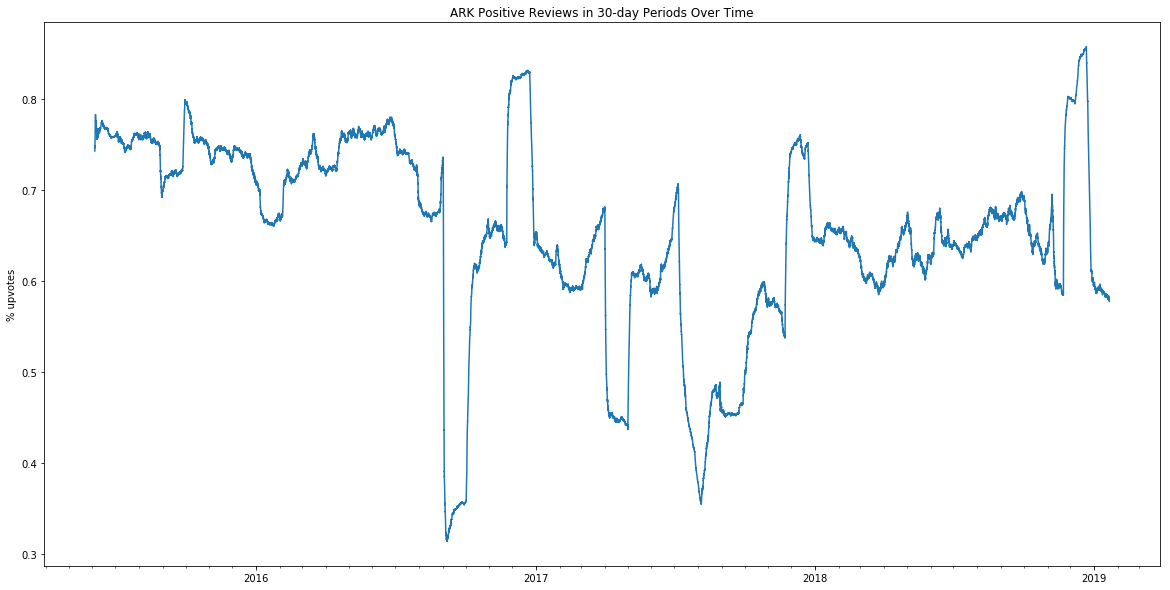

In [94]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
yearsFmt = mdates.DateFormatter('%Y')

date = df['time_of_review'].iloc[1000:]
percent = df['percent_window'].iloc[1000:]

#ax = plt.figure(figsize=(20,10))
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(date, percent)


ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

plt.ylabel('% upvotes')
plt.title('ARK Positive Reviews in 30-day Periods Over Time')

plt.show()

In [91]:
#fig.savefig('1day_ARK.png')

In [50]:
data = pd.DataFrame([])

a = np.diff(df['time_of_review_unix'], n=100)
b = np.diff(df['percent_upvotes'], n=100)*10000

data['z_p'] = b/a
#data['y_p'] = np.diff(df['percent_upvotes'],n=100) / np.diff(df['time_of_review_unix'],n=100)
#data['x_p'] = np.diff(df['time_of_review_unix'],n=100)
data['x_p'] = (np.array(df['time_of_review_unix'])[:-100] + np.array(df['time_of_review_unix'])[100:]) / 2

#data['y_p'] = data['y_p']/data['y_p'].max()

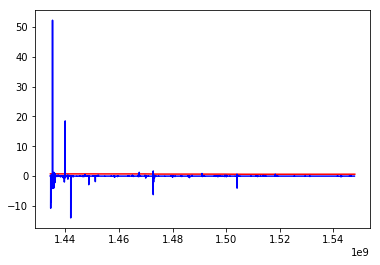

In [52]:
plt.figure(2)
plt.plot(df['time_of_review_unix'].iloc[5000:], df['percent_upvotes'].iloc[5000:], 'r')
plt.plot(data['x_p'][5000:], data['z_p'][5000:], 'b')

plt.show()

In [42]:
a = np.diff(df['time_of_review_unix'])
b = np.diff(df['percent_upvotes'])*10000

In [43]:
b[0:10]

array([    0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        , -1250.        ,   138.88888889,
        -888.88888889,  -727.27272727])